In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

#Generating data from normal distribution and beta distribution

In [2]:
mu, sigma = 5, 0.4 # mean and standard deviation
nor = np.random.normal(mu, sigma,size = 1000)
beta = np.random.beta(a= 2, b= 5 ,size = 500)

#Computing percentiles

In [3]:
nor_sorted = np.sort(nor)
beta_sorted = np.sort(beta)

nor_percentile = [np.percentile(nor_sorted ,i) for i in range(1,101)]
beta_percentile = [np.percentile(beta_sorted ,i) for i in range(1,101)]


#Plotting the percentiles for Q-Q plot




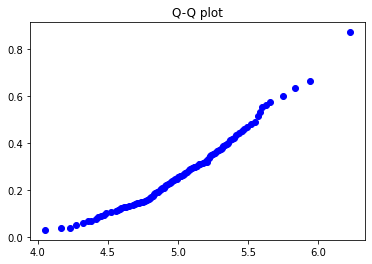

In [4]:
plt.scatter(x= nor_percentile , y =beta_percentile ,color = 'b')
plt.title('Q-Q plot')
plt.show()

Observation :

The scatter points are not in a perfect straight line but to be sure I am plotting the straight line by fitting least square on the percentiles.

#Fitting the straight line using Linear Regression

In [5]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(np.array(nor_percentile).reshape(-1,1), np.array(beta_percentile).reshape(-1,1))
#reshaping because the input requires 2-d array

fit = lr.predict(np.array(nor_percentile).reshape(-1,1))

#Plotting Q-Q plot

First using the code the above code , second using the scipy.stats.probplot function.

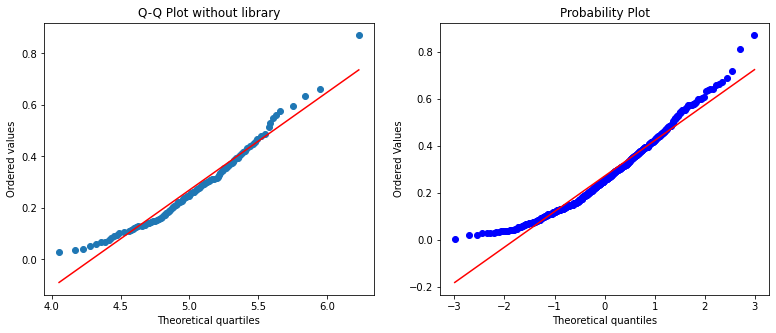

In [7]:
from scipy import stats

fig,ax = plt.subplots(1,2, figsize = [13,5])
# using the computed percentiles and our Linear regression fitted line
ax[0].plot(nor_percentile,fit , color = 'r') # fitted line
ax[0].scatter(nor_percentile,beta_percentile) # percentiles
ax[0].set_title('Q-Q Plot without library') 
ax[0].set_xlabel('Theoretical quartiles')
ax[0].set_ylabel('Ordered values')
 
# using the probplot function
x = stats.probplot(beta, plot =ax[1] )
plt.show()

Observation :
The results look really close and we can easily see that the quartiles are not on the same line. The X-axis is different because I did not use the standard normal values in the Normal distribution, but it does'nt matter.